In [1]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

from src.linear_model import LinearModel
import LogisticRegression

import time


ds1_training_set_path = 'data/ds1_train.csv'
ds1_valid_set_path = 'data/ds1_valid.csv'
ds2_training_set_path = 'data/ds2_train.csv'
ds2_valid_set_path = 'data/ds2_valid.csv'



def plot_res_log_reg(x,y, theta_na, theta_gd):
    """Quick and dirty function to plot the result of the two methods for fitting a Logistic Regression algorithm 
        in the same grapg

    """
    correction=1.0
    plt.figure()

    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2_na = -(theta_na[0] / theta_na[2] * correction + theta_na[1] / theta_na[2] * x1)
    plt.plot(x1, x2_na, c='red', linewidth=2)

    x2_gd = -(theta_gd[0] / theta_gd[2] * correction + theta_gd[1] / theta_gd[2] * x1)
    plt.plot(x1, x2_gd, c='yellow', linewidth=2);


### Let's load the dataset and visualize it.

In [2]:
x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path, add_intercept=True)

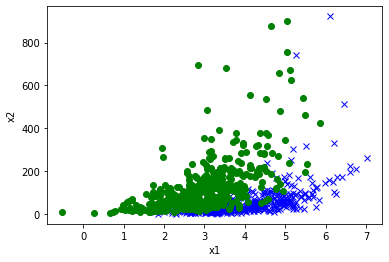

In [3]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx', linewidth=2);
plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], 'go', linewidth=2);

To better see where our model is going to define the decision boundaries, we are going to visualize the dataset according to the label of the training data.

### Let's create an instance of our model and train it. 

In [4]:
log_reg = LogisticRegression.LogisticRegression()

start = time.time()
log_reg.fit(x_train, y_train)
end = time.time()

time_log_reg = end - start

Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on training set is:  0.8825
Time taken:  0.0021028518676757812


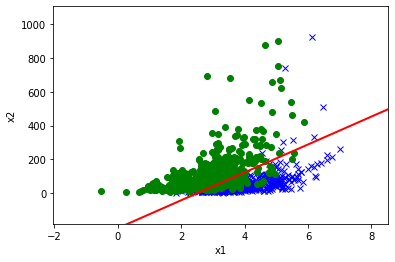

In [5]:
util.plot(x_train, y_train, theta=log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on training set is: ", np.mean(log_reg.predict(x_train) == y_train))
print("Time taken: ", time_log_reg)

In this instance, we fit our theta using the Newton method as requested by the problem set one. In order to better hone my skill, I am going to implement the gradient ascend algorithm. 

In [6]:
log_reg_gd = LogisticRegression.LogisticRegression()
start = time.time()
log_reg_gd.fit_gd(x_train, y_train)
end = time.time()

time_log_reg_gd = end - start

In [7]:
print("Theta is: ", log_reg_gd.theta)
print("The accuracy on training set is: ", np.mean(log_reg_gd.predict(x_train) == y_train))
print("Time taken: ", time_log_reg_gd)

Theta is:  [-4.78193234  2.00005046 -0.0271297 ]
The accuracy on training set is:  0.88625
Time taken:  5.885743141174316


The difference in time is: -5.883640289306641


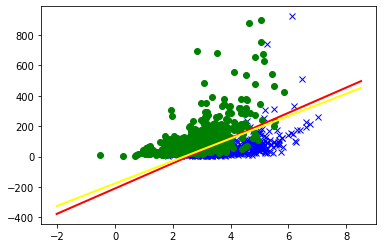

In [8]:
plot_res_log_reg(x_train, y_train,log_reg.theta,log_reg_gd.theta)
print("The difference in time is:", time_log_reg - time_log_reg_gd)

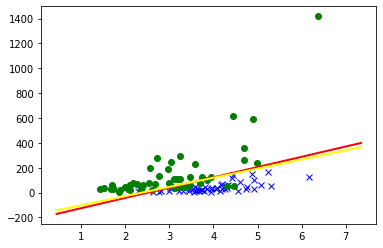

In [9]:
plot_res_log_reg(x_valid, y_valid,log_reg.theta,log_reg_gd.theta)

## Discussion

The results of the two fitting methods are quite comparable. Even though Gradient Descent(GD) resulted in a slightly more accurate model (88.6% compared to 88.2% of the Newton's Method (NM)), the difference is rather small and it is overshadowed by the difference in time. NM took almost 5 seconds less than GD to reach an optimal solution, albeit slightly less accurate. Even though the measuring method is a rather jenky one, we can still use its results to draw our conclusion, which is that in this particular case, NM performed better than GD. 
Admittedly, GD could be further optimized as the implementation used in this example is a very naive one. It is not wrong to expect more optimized varients like Stochastic Gradient Descend or Mini-Batch Gradient Descent to reach accuracywise-comparable solutions in faster time. 

In [10]:
def plot(x, y, theta_1, legend_1=None, theta_2=None, legend_2=None, title=None, correction=1.0):
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta_1^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta_1[0] / theta_1[2] * correction + theta_1[1] / theta_1[2] * x1)
    plt.plot(x1, x2, c='red', label=legend_1, linewidth=2)

    # Plot decision boundary (found by solving for theta_2^T x = 0)
    if theta_2 is not None:
        x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
        x2 = -(theta_2[0] / theta_1[2] * correction + theta_2[1] / theta_2[2] * x1)
        plt.plot(x1, x2, c='black', label=legend_2, linewidth=2)

    # Add labels, legend and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    if legend_1 is not None or legend_2 is not None:
        plt.legend(loc="upper left")
    if title is not None:
        plt.suptitle(title, fontsize=12)

In [11]:
x_train, y_train = util.load_dataset(ds1_training_set_path)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path)

In [12]:
import GDA

In [13]:
gda = GDA.GDA()
start = time.time()
gda.fit(x_train, y_train)
end = time.time()
time_gda = end - start
print("Time taken:", time_gda)

Time taken: 0.0013611316680908203


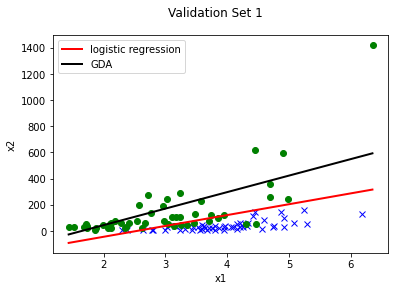

In [14]:
plot(x_valid, y_valid, theta_1=log_reg.theta, legend_1='logistic regression', theta_2=gda.theta, legend_2='GDA', title='Validation Set 1')

## Discussion
Albeit faster, Gaussian Discriminant Analysis (GDA) performed worse than Logistic Regression (LR) on this dataset. The reason for it is that GDA makes a stronger assumption than LR. As a matter of fact, as also somewhat implied by the name, GDA assumes that the input is distributed according to a gaussian distribution. If this is true, than we can use the algorithm as we developed it and expect GDA to perform better. In this case though, the input was not distributed with a gaussian distribution and, since the assumption was wrong, LR performed better

[LR] The accuracy on training set is:  0.915
[GDA] The accuracy on training set is:  0.91375


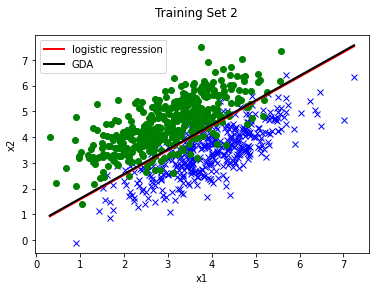

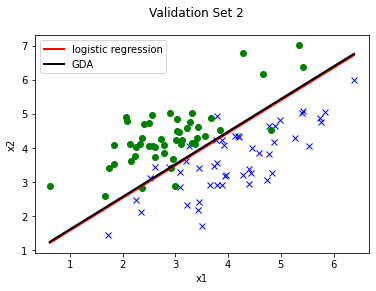

In [24]:
# Train logistic regression
x_train, y_train = util.load_dataset(ds2_training_set_path, add_intercept=True)
log_reg2 = LogisticRegression.LogisticRegression()
log_reg2.fit(x_train, y_train)
print("[LR] The accuracy on training set is: ", np.mean(log_reg2.predict(x_train) == y_train))
# Train GDA
x_train, y_train = util.load_dataset(ds2_training_set_path)
gda2 = GDA.GDA()
gda2.fit(x_train, y_train)
print("[GDA] The accuracy on training set is: ", np.mean(gda2.predict(x_train) == y_train))
# Plot decision boundaries on training set 2
plot(x_train, y_train, theta_1=log_reg2.theta, legend_1='logistic regression', theta_2=gda2.theta, legend_2='GDA', title='Training Set 2')

# Plot decision boundaries on validation set 2
x_valid, y_valid = util.load_dataset(ds2_valid_set_path)
plot(x_valid, y_valid, theta_1=log_reg2.theta, legend_1='logistic regression', theta_2=gda2.theta, legend_2='GDA', title='Validation Set 2')

## Discussion

Contrary to the first dataset, the second on is distributed over a Gaussian Distribution, therefore GDA performs significantly better. As a matter of fact, both LR and GDA reach an accuracy of over 91%, albeit LR still being slightly more accurate (91.5% against 91.4%)

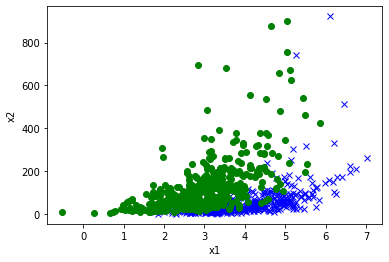

In [40]:
x_train, y_train = util.load_dataset(ds1_training_set_path)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx', linewidth=2);
plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], 'go', linewidth=2);

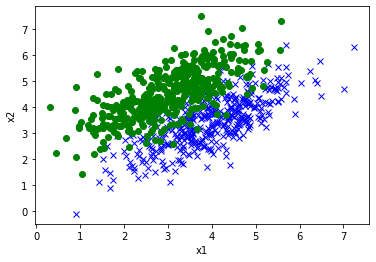

In [41]:
x_train2, y_train2 = util.load_dataset(ds2_training_set_path)
x_valid, y_valid = util.load_dataset(ds2_valid_set_path)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train2[y_train2 == 1, -2], x_train2[y_train2 == 1, -1], 'bx', linewidth=2);
plt.plot(x_train2[y_train2 == 0, -2], x_train2[y_train2 == 0, -1], 'go', linewidth=2);

[LR] The accuracy on training set is:  0.91
[GDA] The accuracy on training set is:  0.91125


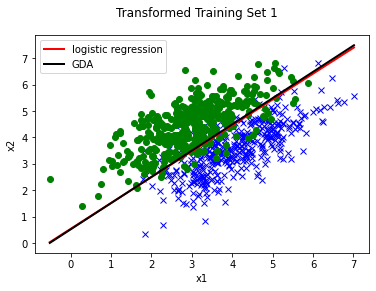

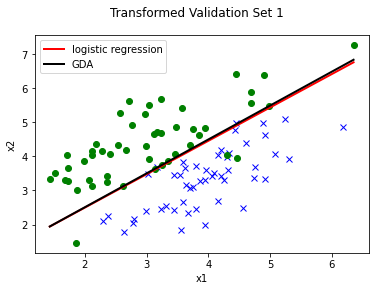

In [28]:
x_train, y_train = util.load_dataset(ds1_training_set_path)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path)
transformed_x_train = np.stack((x_train[:,0], np.log(x_train[:,1])), axis=1)
transformed_x_valid = np.stack((x_valid[:,0], np.log(x_valid[:,1])), axis=1)

# Train logistic regression
transformed_x_train_with_intercept = util.add_intercept(transformed_x_train)
log_reg = LogisticRegression.LogisticRegression()
log_reg.fit(transformed_x_train_with_intercept, y_train)

# Train GDA
gda = GDA.GDA()
gda.fit(transformed_x_train, y_train)

print("[LR] The accuracy on training set is: ", np.mean(log_reg.predict(transformed_x_train_with_intercept) == y_train))
print("[GDA] The accuracy on training set is: ", np.mean(gda2.predict(transformed_x_train) == y_train))
# Plot decision boundaries on training set 1
plot(transformed_x_train, y_train, theta_1=log_reg.theta, legend_1='logistic regression', theta_2=gda.theta, legend_2='GDA', title='Transformed Training Set 1')

# Plot decision boundaries on validation set 1
plot(transformed_x_valid, y_valid, theta_1=log_reg.theta, legend_1='logistic regression', theta_2=gda.theta, legend_2='GDA', title='Transformed Validation Set 1')

## Discussion

For some downstream application it is needed to transform the data to at least resemble a normal distribution. It seems that the logarithm transformation (LT) is most often used in the literature, followed by sqrt(Y) and sometimes 1/sqrt(Y). Questions are often asked here about data standardization as well, and LT usually gets a mention.

https://itl.nist.gov/div898/handbook/eda/section3/eda336.htm


Using this Box-Cox transformation, i.e. by applying the log, the data has been transformed and now it is distributed over a normal, i.e. gaussian, distribution, making GDA perform the same as LR. 